<a href="https://colab.research.google.com/github/GusRaymundi/PDI/blob/main/LAB2_Alargamento_Contraste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB2 — Alargamento de Contraste e Equalização de Histograma

Disciplina: **Processamento Digital de Imagens (PDI)** – UFPel  
Professor: **Guilherme Corrêa**  

Este notebook introduz e pratica os conceitos de **alargamento de contraste** e **equalização de histogramas** em imagens digitais.  

---

## Objetivos  
- Carregar e visualizar imagens em escala de cinza.  
- Calcular e interpretar **histogramas** de intensidade.  
- Implementar o **alargamento de contraste** linear, mapeando a faixa de intensidade original para todo o intervalo [0, 255].  
- Utilizar função de **equalização de histograma**.  
- Comparar os efeitos visuais e nos histogramas das diferentes transformações.  

---

## 1) Bibliotecas úteis
Se estiver no Colab, rode a célula de instalação uma única vez.

In [1]:
# Se necessário no Colab, descomente a linha abaixo:
!pip -q install numpy matplotlib scikit-image imageio

In [2]:
# %% setup - Importações e funções utilitárias
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv
from pathlib import Path

In [3]:
def converte_cinza(figura):
    """
    Recebe o caminho de uma imagem BMP, converte para escala de cinza, salva a imagem, retorna o caminho.
    """
    # Carrega a imagem BMP e converte para escala de cinza
    path = Path(figura)
    img = Image.open(figura).convert('L')

    # Salva a imagem em escala de cinza
    out_path = path.with_name(path.stem + "_cinza.bmp")
    img.save(out_path, format="BMP")

    return str(out_path)

## 2) Abrindo uma imagem e apresentando seu histograma
Vamos criar uma função **Python** que:
- **Receba** o caminho de uma imagem BMP em escala de cinza.
- **Apresente** a imagem e o histograma da imagem.
- **Use a imagem ``lena_lc.bmp``** disponibilizada no github (pasta ``data``) para os testes.

Nome sugerido para a função: `mostra_img_histograma(figura)`.

In [4]:
def mostra_img_histograma(figura):
    """
    Recebe o caminho de uma imagem BMP,
    exibe a imagem e apresenta seu histograma (lado a lado).
    """
    # Carrega a imagem BMP
    path = Path(figura)
    img = Image.open(figura)
    img_array = np.array(img).flatten()

    # Cria figura com 2 colunas
    plt.figure(figsize=(12,5))

    # Mostra a imagem
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(f"Imagem: {path.name}")
    plt.axis('on')

    # Mostra o histograma
    plt.subplot(1,2,2)
    plt.hist(img_array, bins=256, range=(0,255), color='black')
    plt.title(f"Histograma ({path.name})")
    plt.xlabel("Intensidade (0–255)")
    plt.ylabel("Frequência de pixels")

    plt.tight_layout()
    plt.show()

Crie abaixo o código de chamada desta função criada.

Não esqueça de fazer upload da imagem BMP para o ambiente Colab.

--2025-10-02 18:39:05--  https://github.com/guirco/ufpel-pdi/raw/main/data/lena_lc.bmp
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/guirco/ufpel-pdi/main/data/lena_lc.bmp [following]
--2025-10-02 18:39:05--  https://raw.githubusercontent.com/guirco/ufpel-pdi/main/data/lena_lc.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 988090 (965K) [image/bmp]
Saving to: ‘lena_lc.bmp’

lena_lc.bmp         100%[===================>] 964.93K  --.-KB/s    in 0.03s   

2025-10-02 18:39:05 (32.5 MB/s) - ‘lena_lc.bmp’ saved [988090/988090]



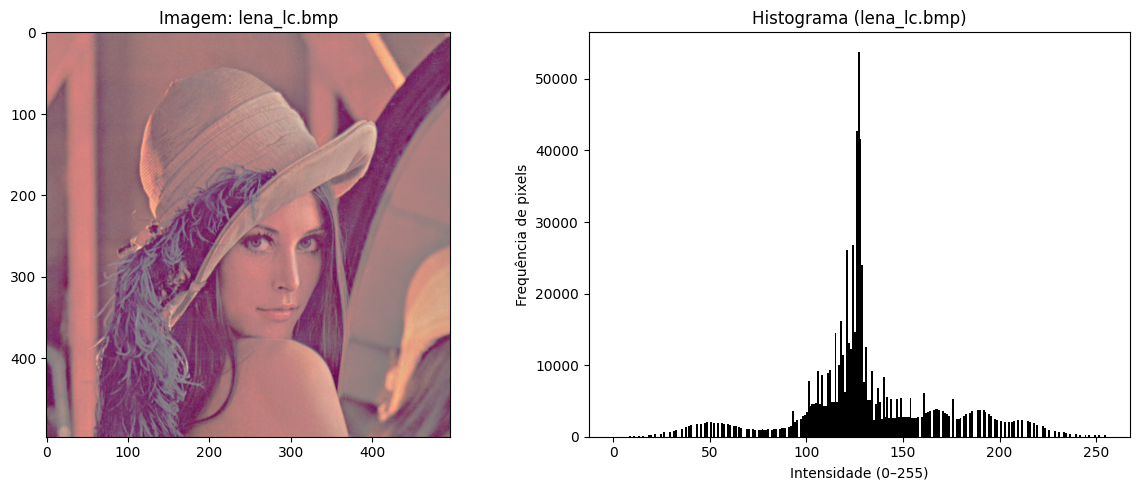

In [8]:
# Seu código aqui

!wget https://github.com/guirco/ufpel-pdi/raw/main/data/lena_lc.bmp
mostra_img_histograma("lena_lc.bmp")


---
# 🖼️ Tarefa A — Função de Alargamento de Contraste

Implemente uma função em **Python** que:  

1. **Receba** o caminho de uma imagem BMP (`figura`) em escala de cinza.  
2. **Calcule** os valores mínimo (`imin`) e máximo (`imax`) de intensidade presentes na imagem.  
3. **Reescale** (normalize) todos os pixels para que `imin` seja mapeado para `0` e `imax` seja mapeado para `255`.
4. **Salve** a nova imagem em um novo arquivo BMP.
5. **Retorne** o caminho da nova imagem.

⚠️ Caso `imin == imax` (imagem com intensidade constante), a função deve simplesmente retornar uma imagem preta (todos os valores 0).  

---

### Nome sugerido da função:
```python
def contraste(figura):
    ...


In [26]:
def contraste(figura):
    """
    Recebe o caminho de uma imagem BMP já em escala de cinza,
    aplica alargamento de contraste (min -> 0, max -> 255),
    salva a nova imagem em formato BMP
    e retorna o caminho do arquivo salvo.
    """
    path = Path(figura)

    # 1. Carrega a imagem
    img = Image.open(path)
    img_array = np.array(img).flatten()

    # 2. Calcula valores mínimo e máximo
    imin = img_array.min()
    imax = img_array.max()

    # 3. Alargamento de contraste
    if imin == imax:
        img_contraste = np.zeros_like(img_array, dtype=np.uint8)
    else:
        img_contraste = ((img_array - imin) * 255 / (imax - imin)).astype(np.uint8)

    # 4. Salvar nova imagem BMP
    img_contraste = img_contraste.reshape(img.height, img.width)  # corrigi a ordem aqui
    out_path = path.with_name(path.stem + "_contraste.bmp")
    Image.fromarray(img_contraste, mode='L').save(out_path, format="BMP")

    return str(out_path)




Agora vamos criar o código que utilize essa função.

Queremos ver:
- A imagem original em escala de cinza e seu histograma.
- A imagem com contraste alargado e seu histograma.

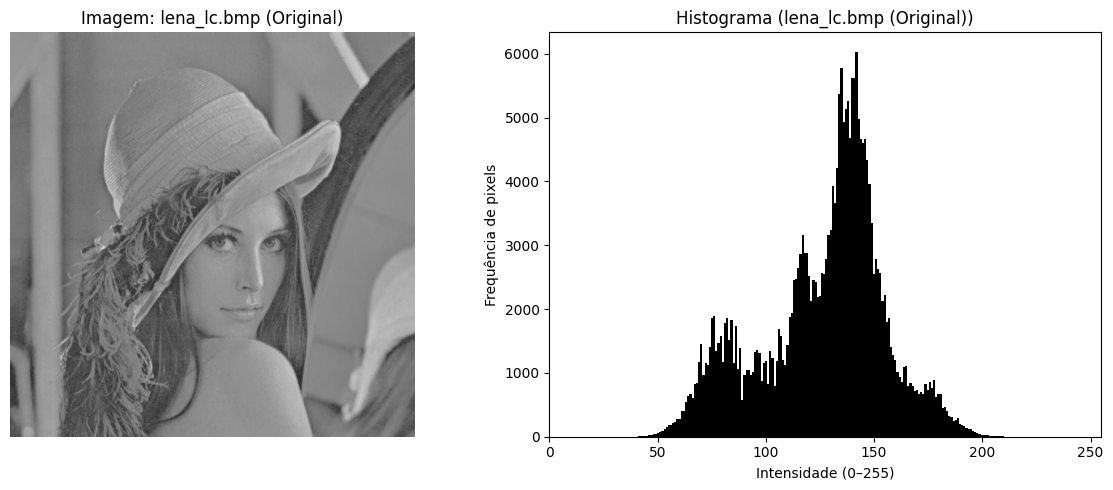


[INFO: Processamento] Mínimo: 37, Máximo: 227


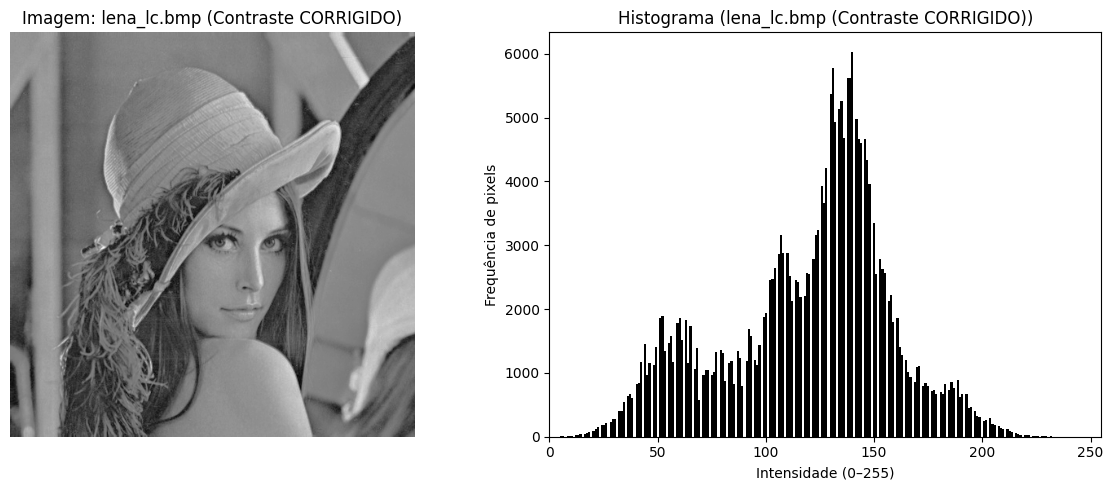

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Função de alargamento de contraste (COM CORREÇÃO DE TIPO) ---
def contraste_array(figura):
    """
    Aplica o alargamento de contraste com a correção do dtype e retorna o array processado.
    """
    path = Path(figura)
    img = Image.open(path).convert("L")
    img_array = np.array(img).flatten()

    imin = img_array.min()
    imax = img_array.max()

    print(f"\n[INFO: Processamento] Mínimo: {imin}, Máximo: {imax}")

    if imin == imax:
        # Caso degenerado
        return np.zeros_like(img_array).reshape(img.height, img.width).astype(np.uint8)
    else:
        # CORREÇÃO: Usar 255.0 força a operação a ser float, prevenindo o truncamento para 0.
        img_contraste = ((img_array - imin) * 255.0 / (imax - imin)).astype(np.uint8)
        return img_contraste.reshape(img.height, img.width)


# --- Função para mostrar array e histograma (COM CORREÇÃO VISUAL) ---
def mostra_array_histograma(array_2d, titulo):
    """
    Recebe um array NumPy 2D e exibe a imagem e seu histograma,
    com a correção visual (rwidth=1) para eliminar o zebrado.
    """
    array_flat = array_2d.flatten()

    plt.figure(figsize=(12,5))

    # 1. Imagem
    plt.subplot(1,2,1)
    plt.imshow(array_2d, cmap='gray', vmin=0, vmax=255)
    plt.title(f"Imagem: {titulo}")
    plt.axis('off')

    # 2. Histograma
    plt.subplot(1,2,2)
    # AJUSTE CRUCIAL: rwidth=1 garante que as barras se toquem, eliminando o artefato zebrado.
    plt.hist(array_flat, bins=256, range=(0,255), color='black', rwidth=1)
    plt.title(f"Histograma ({titulo})")
    plt.xlabel("Intensidade (0–255)")
    plt.ylabel("Frequência de pixels")
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()


# --- Execução do Programa ---
NOME_IMAGEM = "lena_lc.bmp"

# 1. Exibe o array Original
img_original_array = np.array(Image.open(NOME_IMAGEM).convert("L"))
mostra_array_histograma(img_original_array, NOME_IMAGEM + " (Original)")

# 2. Processa o contraste e exibe o array corrigido
img_contraste_array = contraste_array(NOME_IMAGEM)
mostra_array_histograma(img_contraste_array, NOME_IMAGEM + " (Contraste CORRIGIDO)")

# 📝 Tarefa B — Equalização de Histograma (CLAHE)

Nesta atividade, você irá aplicar uma técnica de **equalização de histograma** chamada CLAHE (Contrast Limited Adaptive Histogram Equalization), implementada e disponível na biblioteca OpenCV (cv2, importada neste notebook). O CLAHE melhora o contraste de imagens em escala de cinza, atingindo resultados melhores que o simples alargamento de contraste global.


### Passos a seguir:

1. **Carregue uma imagem em tons de cinza**  
   - Use a função `converte_cinza` (ou equivalente) para garantir que a imagem esteja no formato escala de cinza.  
   - Exemplo:  
     ```python
     img_cinza = converte_cinza("lena_lc.bmp")
     ```

2. **Aplique o alargamento de contraste que implementamos antes (apenas para comparar)**  
   - Use a função `contraste` já implementada para gerar uma nova versão da imagem com contraste expandido (como fizemos no exercício anterior).  
   - Exemplo:  
     ```python
     img_contraste = contraste(img_cinza)
     ```

3. **Visualize a imagem original e a imagem com contraste alargado, como já fizemos na tarefa anterior**  
   - Utilize a função `mostra_img_histograma` para exibir a imagem **e seu histograma** lado a lado.  
   - Exemplo:  
     ```python
     mostra_img_histograma(img_cinza)
     mostra_img_histograma(img_contraste)
     ```

4. **Agora aplique CLAHE (Contrast Limited Adaptive Histogram Equalization)**  
   - Utilize o OpenCV parar criar um objeto CLAHE e depois gere a imagem nova:  
     ```python
     claheObj = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
     img_clahe = claheObj.apply(img_cinza_np)
     ```
   - Compare os resultados (imagem + histograma) com o alargamento global.
   - Varie os valores de clipLimit e tileGridSize para avaliar os efeitos do CLAHE.
   - Mostre a imagem resultante e o histograma lado a lado usando `matplotlib`.
---

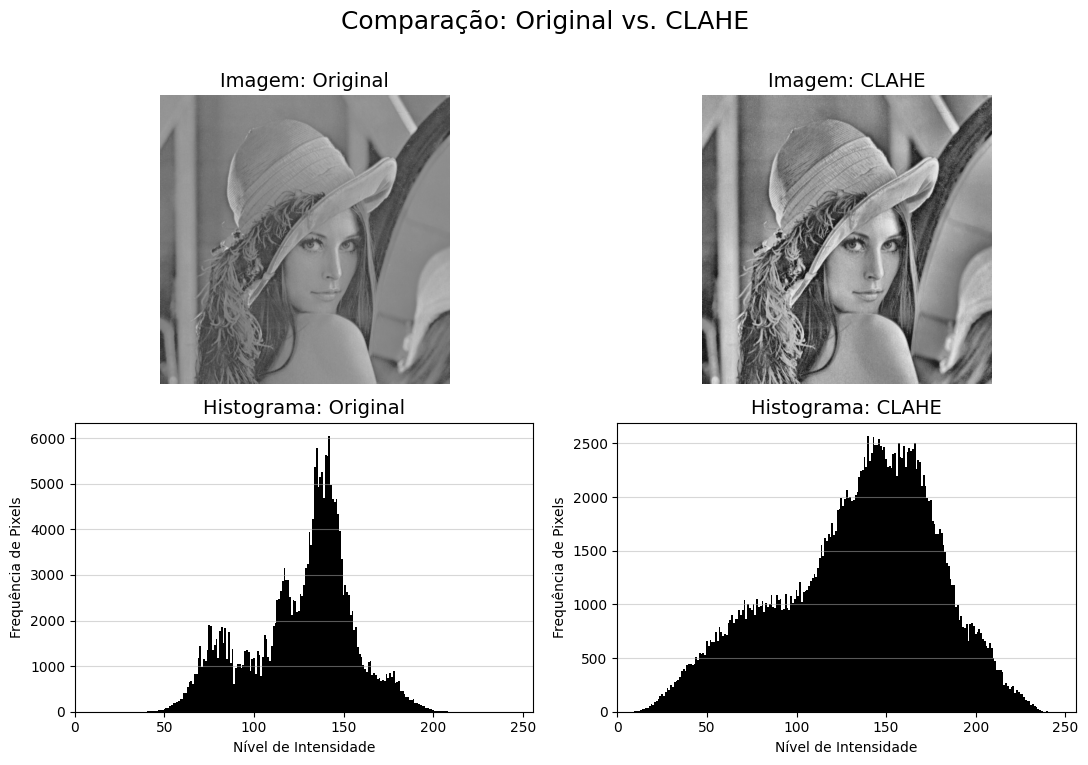

Visualização lado a lado da Imagem Original e CLAHE concluída (histogramas em barras).


In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Funções Auxiliares (mantidas para funcionalidade) ---

def converte_cinza(caminho_imagem):
    # Usando cv.IMREAD_GRAYSCALE para garantir a leitura em cinza
    img = cv.imread(caminho_imagem, cv.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Erro ao carregar a imagem: {caminho_imagem}")
    return img

def contraste(img_cinza):
    min_val = np.min(img_cinza)
    max_val = np.max(img_cinza)
    if max_val - min_val == 0:
        return img_cinza.copy()
    img_contraste = 255 * (img_cinza.astype(float) - min_val) / (max_val - min_val)
    return img_contraste.astype(np.uint8)

# FUNÇÃO MODIFICADA PARA USAR GRÁFICO DE BARRAS (COLUNAS)
def compara_original_clahe(img_orig, img_clahe, titulo_clahe="CLAHE"):
    fig, axes = plt.subplots(2, 2, figsize=(11, 8))
    fig.suptitle(f"Comparação: Original vs. {titulo_clahe}", fontsize=18)

    # Geração dos índices (0 a 255) para o eixo X do gráfico de barras
    bins = np.arange(256)

    # Função interna para plotar uma imagem e seu histograma
    def plot_img_hist(img, ax_img, ax_hist, title):
        if img.dtype != np.uint8:
            img_display = cv.convertScaleAbs(img)
        else:
            img_display = img

        # Imagem
        ax_img.imshow(img_display, cmap='gray', vmin=0, vmax=255)
        ax_img.set_title(f"Imagem: {title}", fontsize=14)
        ax_img.axis('off')

        # Histograma
        hist = cv.calcHist([img_display], [0], None, [256], [0, 256])

        # *** ALTERAÇÃO AQUI: Usando plt.bar para colunas pretas ***
        ax_hist.bar(bins, hist.flatten(), color='black', width=1.0)
        # --------------------------------------------------------

        ax_hist.set_title(f"Histograma: {title}", fontsize=14)
        ax_hist.set_xlabel("Nível de Intensidade")
        ax_hist.set_ylabel("Frequência de Pixels")
        ax_hist.set_xlim([0, 256])
        ax_hist.grid(axis='y', alpha=0.5)

    # 1. Plotar Imagem Original
    plot_img_hist(img_orig, axes[0, 0], axes[1, 0], "Original")

    # 2. Plotar Imagem CLAHE
    plot_img_hist(img_clahe, axes[0, 1], axes[1, 1], titulo_clahe)

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

# --- Caminho da Imagem ---
CAMINHO_IMAGEM = "lena_lc.bmp" # Substitua pelo caminho correto da sua imagem

# Carregue a imagem original
img_cinza = converte_cinza(CAMINHO_IMAGEM)
img_cinza_np = img_cinza

# --- Aplicação do CLAHE com os parâmetros padrão da tarefa ---
clip_limit = 2.0
tile_grid_size = (8, 8)

# Criar e aplicar o objeto CLAHE
claheObj = cv.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
img_clahe = claheObj.apply(img_cinza_np)


# Mostrar imagem original e imagem CLAHE lado a lado
clahe_titulo = 'CLAHE'
compara_original_clahe(img_cinza, img_clahe, clahe_titulo)

print("Visualização lado a lado da Imagem Original e CLAHE concluída (histogramas em barras).")